# Bayesian Hypothesis Testing (Chapter 12.1)
* Hypothesis testing is about decision making
    * Is head probability of coin equal to 0.5 credible, given the data?


* The book shows two ways: the ROPE approach and the model comparison approach.  
* In the course we only consider the ROPE appraoch as more intuitive and clear. 
* You are welcome to study the model comparison method yourself (for the interested only).

## The Estimation Approach (ROPE)

**Def.** The 'null value' traditionally the value that we want to test. Often the value that we want to reject.  

**Example.** If we want to prove that a coin is biased, we want to reject the null value of 0.5

### The basic principle

* **Decision Rule 1.** If the null value is far from credible values: **reject** the hypothesis
* **Decision Rule 2.** If all credible values are practically equivalent to the null value: **accept** the hypothesis

## Region of Practical Equivalence (ROPE)

**Def.** A small range of parameter values that are consider to be pratically equivalent to the null value for the purpose of the particular application.

**Example.** If we need a fair coin we probably think that anything with $\theta\in(0.45,0.55)$ is practically equivalent. Our null hypothesis is that $\theta = 0.5 \pm 0.05$

### We use ROPE to make the decision rules concrete:

**Decision Rule 1.** A parameter value is rejected, if its entire ROPE lies outside the 95% HDI of the posterior for this parameter

**Decision Rule 2.** A parameter value is accepted if its ROPE completely contains the 95% HDI of the posterior for that parameter

What when ROPE and HDI overlap without any inclusion? -> no conclusion!

## Examples. How to choose ROPE? 
* Bring application into the picture
* If you want to show that performance of a new medicine is better, it needs to be sufficiently small not to overlap with the performance of the old medicine (Decision Rule 1 will likely be used).
* If the new scientific theory is more precise, it needs to be sufficiently small to make the estimation more precise than in the old theory (Either decision is to be used, but ROPE should be smaller)
* If it is used to navigate a robot, it has to be sufficiently small to warrant no collisions, etc.

<style>
.container{
    display: flex;
}
.col{
    flex: 2;
}
</style>



## Example for Decision Rule 1, Deciding that a coin is biased

![](biased-coin.jpg)

* This is  very similar to standard statistical hypothesis testing 
  * Just without its problems that we side stepped in this course
  * See Chapter 11 for the elaboration, if interested
* The null value is $\theta = 0.5 \pm 0.01$ so ROPE=(0.49,0.51)
* 95% HDI falls outside ROPE
* We conclude that it is very unlikely that the coin is unbiased, so it is very likely that it is biased.
* In other words: we reject the hypothesis that $\theta = 0.5$


## Example for Decision Rule 2, Establishing that there is no effect

<img style="float: right;" src="no-effect.jpg">

* $\delta$ is an *effect size*, so value zero means 'no effect' 
    * No effect of treatment with a medicine,  
    * Switching control strategy in a robot has not yield any improvement in utility
* The application decided that ROPE is $\pm 0.10$ so $(-0.10,+0.10)$ for $\delta=0$
* 95% HDI is entirely contained in the ROPE
* By Decision Rule 2 we accept the hypothesis that there is no effect ($\delta = 0.0 \pm 0.10$) 
* In fact 100% of the probability mass is in ROPE
* The right diagram shows how decreasing the ROPE decreases the chance of acceptance
* The dashed line on x-axis shows what is the smallest rope size for which 95% of the HDI is still included inside.
* The 0.975 label on the dashed line is cryptic to say the least
* This is the amount of the posterior distribution inside a ROPE centered on the null value as a function of the width of the ROPE
* This value is higher than 95% because the mode of the distribution and the null value do not align precisely

# Example for Decision 2, Establishing that a coin is fair

<img style="float: right;" src="coin-is-fair.jpg">

* We want to establish that a coin is fair with a ROPE from 0.49 to 0.51
* 95% falls entirely within ROPE (in fact 96% does)
* Some of the posterior is outside ROPE.  This is our uncertainty about the conclusion (5% is often acceptable in statistical testing, but both the size of ROPE and HDI can be tweaked for the application, depending how much risk are you willing to take)




## Summarizing Bayesian Decision Making (Odds-and-ends)

* If using MCMC to estimate the HDI, remember that the endpoints of HDI are not very precisely estimated.
  * Better to have a good distance between the endpoints of ROPE and HDI (in either of the decision rules).
* Remember: Boolean decisions are huge oversimplifications of an outcome of Bayesian inference. 
  * Whenever possible, we should use the entire posterior in further system execution, value estimation, prediction, etc.
* Even reporting the endpoints of 95% HDI carries more information than the outcome of a Boolean test.
* The decision procedure, is in-principle, a separate step from the Bayesian inference.





# Deciding whether two parameters are different (for instance in hierarhical models)

* Important: the marginal distributions of two parameters do not reveal whether two parameters are different. 
* You cannot test difference between two parameters by comparing two marginal posteriors visually.

* Instead we test whether it is likely that their difference is zero. 
* (using either decision rule 1 or 2, depending whether you need to accept or reject this hypothesis)

# Example (with difference)

* Two correlated parameters for which the difference is highly concentrated (so it seems almost constant)
* We can conclude that the difference is non-zero with a small ROPE and HDI 95% analyzing the difference posterior in the bottom right
* The top-left diagram shows why (joint posterior)
* Still the marginals are the same ! (the other two posterior plots)

![](marginal-problem-1.png)

# Example (with no constant difference)

* Two inversely correlated parameters for which the difference is dispersed (and it would be hard to accept a hypothesis that this difference is constant)
* The difference posterior plot contains zero in the middle of HDI, and we cannot make any conclusion

![](marginal-problem-2.png)

For both of these figures though, the marginals look the same, as the ranges and probability values of the parameters are similar (just the correlation differs).


Credits: some examples and images in this lecture are from the blog post by John Kruschke at https://doingbayesiandataanalysis.blogspot.com/2013/08/how-much-of-bayesian-posterior.html

# Section 9.5.1 Baseball batting abilities by position (revisitted)

In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az
from matplotlib import pyplot as plt

We begin with loading the data. Note that the last column contains the primary position number (counting from 1) which we will use instead of the name for easy of modeling.

In [2]:
data = pd.read_csv('BattingAverage.csv')
data

Player       PriPos  Hits  AtBats  PlayerNumber  PriPosNumber
0        Fernando Abad      Pitcher     1       7             1             1
1          Bobby Abreu   Left Field    53     219             2             7
2           Tony Abreu     2nd Base    18      70             3             4
3        Dustin Ackley     2nd Base   137     607             4             4
4           Matt Adams     1st Base    21      86             5             3
..                 ...          ...   ...     ...           ...           ...
943       Brad Ziegler      Pitcher     1       4           944             1
944     Ryan Zimmerman     3rd Base   163     578           945             5
945  Jordan Zimmermann      Pitcher    11      57           946             1
946         Barry Zito      Pitcher     4      53           947             1
947        Ben Zobrist  Right Field   151     560           948             9

[948 rows x 6 columns]

Nasty hacks to translate between position categories and names:

In [3]:
def pos_name(i):
    pos_names = data[ (data.PriPosNumber -1 == i) ].PriPos
    return pos_names.head(1).item()

def name_pos(name):
    pos_numbers = data[ (data.PriPos == name) ].PriPosNumber - 1
    return pos_numbers.head(1).item()


Note the wonderful example in Python below, before you  proceed.  We use it to create arrays of player distributions below, dependent on what position they are.  This block of code is not a part of the model, it is here for explanation only.

In [4]:
a = np.array([1,2,3])
c = [0,0,0,2,2,1]
b = a[c]
b

array([1, 1, 1, 3, 3, 2])

We will now be building the model following Fig. 9.13 (p. 265 in my electronic edition). We try to keep the names in the Python code as close as possible to the figure.

![](figure-9.13.png)

In [5]:
n_categories = len(data.PriPosNumber.unique())
n_players = len(data)
positions = data.PriPosNumber.to_numpy() -1 # -1 since PriPosNumber starts fro 1 but we want inexing from 0

In [6]:
with pm.Model() as model:
    # the top-level prior (Hyper-parameters)
# In machine learning, a hyperparameter is a parameter whose value is set before the learning process begins.
# By contrast, the values of other parameters are derived via training.
    omega = pm.Beta ("omega", 1,1)
    kappa = pm.Deterministic(
        "kappa", 
        pm.Gamma ("kappa_minus_2", 0.01, 0.01) + 2
    )
    
    # paramaters for primary field positions (There are nine standard positions in baseball)
    omega_c = pm.Beta (
        f"omega_c",      # TODO Why using f"" here but not for thete?
        omega * (kappa-2) +1, 
        (1-omega)*(kappa-2) +1, 
        shape=n_categories
    )
    
    kappa_c = pm.Deterministic (
        "kappa_c",
        pm.Gamma ("kappa_c_minus_2", 0.01, 0.01, shape=n_categories) + 2
    )
    
    # parameters for individual player 
    theta = pm.Beta('theta',
                     omega_c[positions]*(kappa_c[positions]-2)+1,
                    (1-omega_c[positions])*(kappa_c[positions]-2)+1,
                     shape = n_players)
    
    # We are using the same "speed-up" trick as Kruschke is doing, 
    # modeling experiences of each player as a Binomial distribution.
    # Note that above we have produced the theta vector in the same 
    # order as the players in the file, so the observed data in the 
    # binomial distribution will be applied correctly, per each of the 
    # variables in the vector.  It seems that because theta is a vector, 
    # the entire y variable is automatically vectorized.
    
    y = pm.Binomial (
        'y', 
        n = data.AtBats.values, 
        p=theta, 
        observed=data.Hits, # TODO
        shape=n_players)
    
    # We add two derived variables in order to make plotting easier:
    omega_pc = pm.Deterministic (
        "omega_pc", 
        omega_c[name_pos("Pitcher")] - omega_c[name_pos("Catcher")]
    )
    omega_c1 = pm.Deterministic (
        "omega_c1", 
        omega_c[name_pos("Catcher")] - omega_c[name_pos("1st Base")]
    )

The following (inspired by https://github.com/JWarmenhoven/DBDA-python/blob/master/Notebooks/Chapter%209.ipynb) seems to show that we have indeed created 948 y variables.

For this to work you need graphviz installed in your path (in Ubuntu: apt install graphviz) and the graphviz package needs to be installed in Python (in Ubuntu: pip3 install graphviz).  If you have troubles getting the software to work on your machine, just skip this step. It is not influencing anything later.

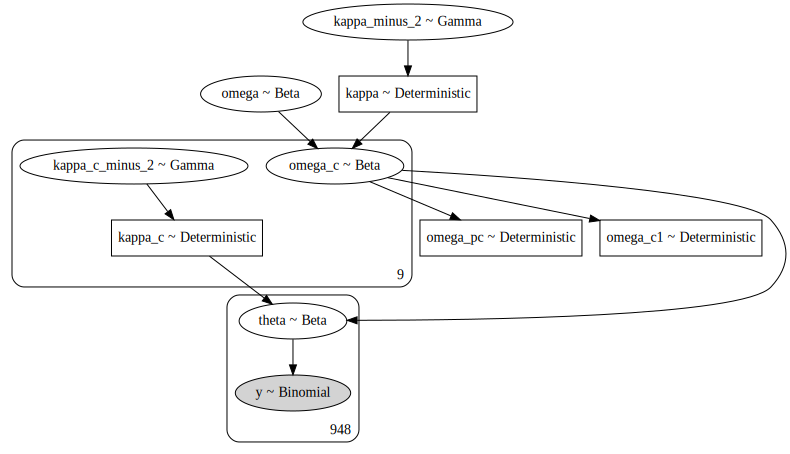

In [7]:
pm.model_to_graphviz (model)

In [8]:
with model:
    trace = pm.sample (5000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, kappa_c_minus_2, omega_c, kappa_minus_2, omega]
Sampling 4 chains, 0 divergences: 100%|██████████| 22000/22000 [02:54<00:00, 126.12draws/s]
The number of effective samples is smaller than 10% for some parameters.


/home/neutron/anaconda3/envs/PP/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/neutron/anaconda3/envs/PP/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/neutron/anaconda3/envs/PP/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/neutron/anaconda3/envs/PP/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/neutron/anaconda3/envs/PP/lib/python3.8/site-packages/arviz/plots/backends/mat

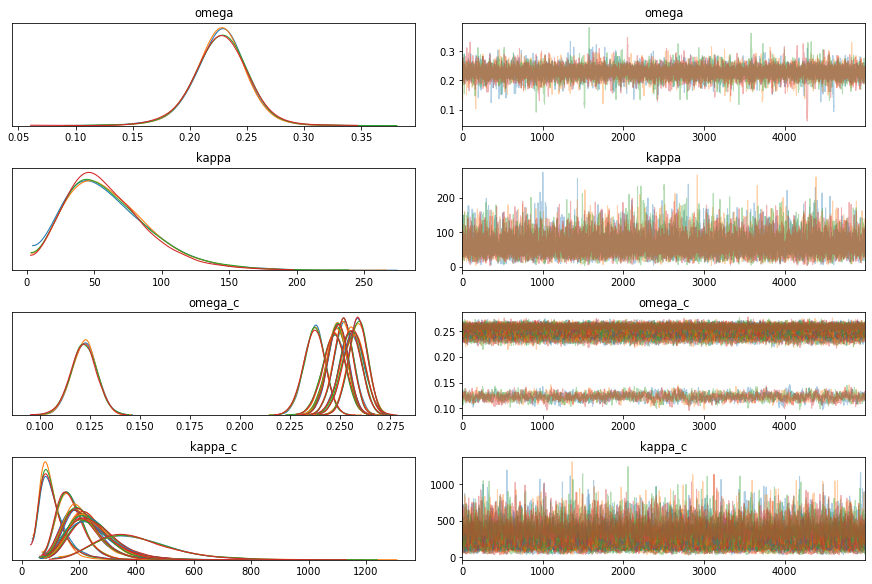

In [9]:
pm.traceplot(trace, ['omega', 'kappa', 'omega_c', 'kappa_c'])
plt.show()
# It seems that the cupious amount of warnings we are getting is a bug (https://github.com/arviz-devs/arviz/issues/988)

In [10]:
az.summary (trace)

mean      sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  \
omega           0.227   0.024   0.182    0.270      0.000    0.000    6821.0   
kappa_minus_2  59.425  32.021   6.758  116.539      0.334    0.236    9173.0   
kappa          61.425  32.021   8.758  118.539      0.334    0.236    9173.0   
omega_c[0]      0.122   0.006   0.110    0.134      0.000    0.000    1054.0   
omega_c[1]      0.237   0.005   0.227    0.247      0.000    0.000    6824.0   
...               ...     ...     ...      ...        ...      ...       ...   
theta[945]      0.154   0.030   0.100    0.211      0.000    0.000   12090.0   
theta[946]      0.111   0.026   0.063    0.160      0.000    0.000   11477.0   
theta[947]      0.266   0.014   0.238    0.292      0.000    0.000   22768.0   
omega_pc       -0.115   0.008  -0.131   -0.100      0.000    0.000    1682.0   
omega_c1       -0.014   0.007  -0.028   -0.001      0.000    0.000    7565.0   

                ess_sd  ess_bulk  ess_tail  r_hat  
omega           6821.0    8875.0    5486.0    1.0  
kappa_minus_2   9173.0    7404.0    6363.0    1.0  
kappa           9173.0    7404.0    6363.0    1.0  
omega_c[0]      1054.0    1055.0    2065.0    1.0  
omega_c[1]      6824.0    6850.0   10530.0    1.0  
...                ...       ...       ...    ...  
theta[945]     10792.0   13078.0   13558.0    1.0  
theta[946]     11477.0   10392.0    8592.0    1.0  
theta[947]     22709.0   22755.0   13846.0    1.0  
omega_pc        1668.0    1688.0    3392.0    1.0  
omega_c1        7565.0    7564.0   11644.0    1.0  

[980 rows x 11 columns]

The following graphs are not so interesting.  This is just if you wanted to investigate posterior performance of various categories (we do not use them this week in class)

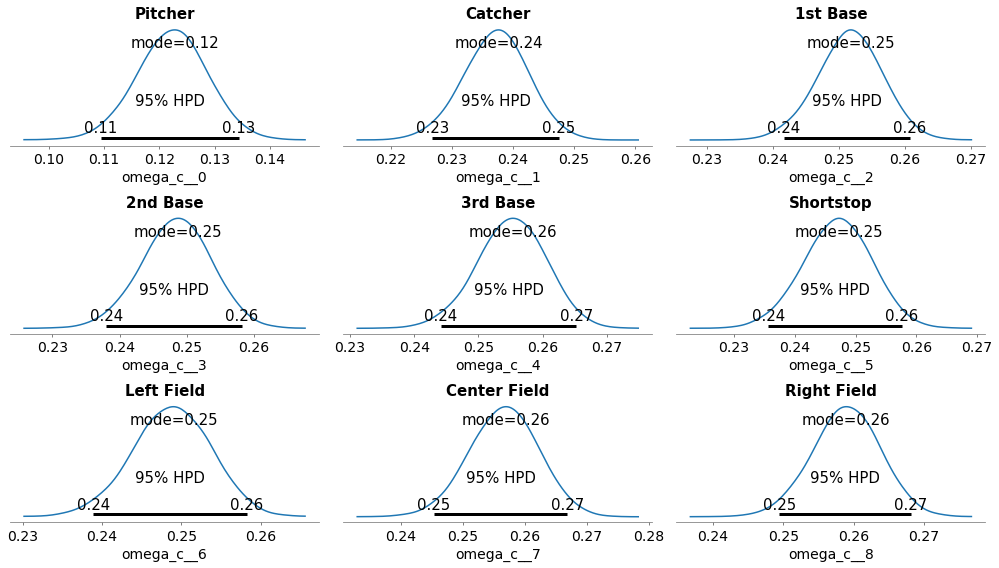

In [11]:
fig, axes = plt.subplots(3,3, figsize=(14,8))

for i,ax in enumerate(axes.flatten()):
    pm.plot_posterior(trace['omega_c'][:,i], ax=ax, point_estimate='mode', credible_interval=0.95)
    ax.set_title(pos_name(i), fontdict={'fontsize':15, 'fontweight':'bold'})
    ax.set_xlabel('omega_c__{}'.format(i), fontdict={'fontsize':14})
    

plt.tight_layout()

## Example with Decision Rule 1
Let's follow section 12.1.2 (and Fig. 9.14) to discuss the difference between pitchers and catchers based on the above posterior.

The ROPE around difference zero is clearly non-overlapping with 95% HDI, so we reject the hypothesis that the Cathers and Pitchers have the same batting ability, concluding that catchers tend to indeed bat better.

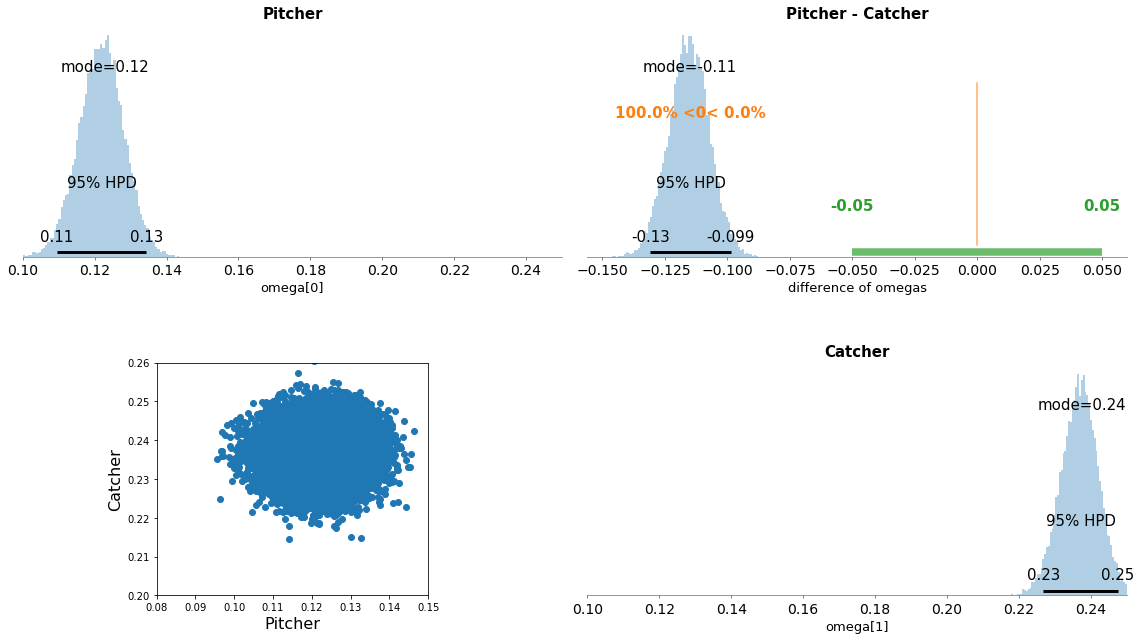

In [12]:
fig, ax = plt.subplots(2,2, figsize=(16,9))

# The pitcher plot
pm.plot_posterior(
    trace['omega_c'][:,name_pos("Pitcher")], ax=ax[0,0], point_estimate='mode', 
    credible_interval=0.95, kind='hist'
)
ax[0,0].set_title("Pitcher", fontdict={'fontsize':15, 'fontweight':'bold'})
ax[0,0].set_xlabel(f"omega[{name_pos('Pitcher')}]", fontdict={'fontsize':13})
ax[0,0].set_xlim(0.10,0.25)

# The catcher posterior plot
pm.plot_posterior(
    trace['omega_c'][:,name_pos("Catcher")], ax=ax[1,1], point_estimate='mode', 
    credible_interval=0.95, kind='hist'
)
ax[1,1].set_title("Catcher", fontdict={'fontsize':15, 'fontweight':'bold'})
ax[1,1].set_xlabel(f"omega[{name_pos('Catcher')}]", fontdict={'fontsize':13})
ax[1,1].set_xlim(0.10,0.25)


# The difference btw Pitchers and Catchers in the posterior.
pm.plot_posterior(
    trace['omega_pc'], ax=ax[0,1], point_estimate='mode', 
    credible_interval=0.95, kind='hist', ref_val=0.0, rope=(-0.05,+0.05)
)
ax[0,1].set_title("Pitcher - Catcher", fontdict={'fontsize':15, 'fontweight':'bold'})
ax[0,1].set_xlabel('difference of omegas', fontdict={'fontsize':13})

# The scatter plot of joint distribution of catchers and pitchers ability
ax[1,0].scatter(trace.omega_c[:,name_pos("Pitcher")], trace.omega_c[:,name_pos("Catcher")], marker='o')
ax[1,0].set(xlim=(0.08,0.15), ylim=(0.2,0.26), aspect='equal')
ax[1,0].set_xlabel('Pitcher', fontdict={'fontsize':16})
ax[1,0].set_ylabel('Catcher', fontdict={'fontsize':16})

plt.tight_layout(h_pad=5)

## Example with Decision Rule 2 [inconclusive]

* We investigate the difference between the Catcher position and the 1st Base
* It seems that the HDI is nicely contained in ROPE, but ...
* The zero difference is sitting on the edge of HDI, it might be very low probability itself.  So while we could conclude that there is no difference (up to this ROPE) it seems safer to say that the result is inconclusive.  Most likely there is a very small difference in favour of the 1st base (but not strong enough evidence to conclude it).

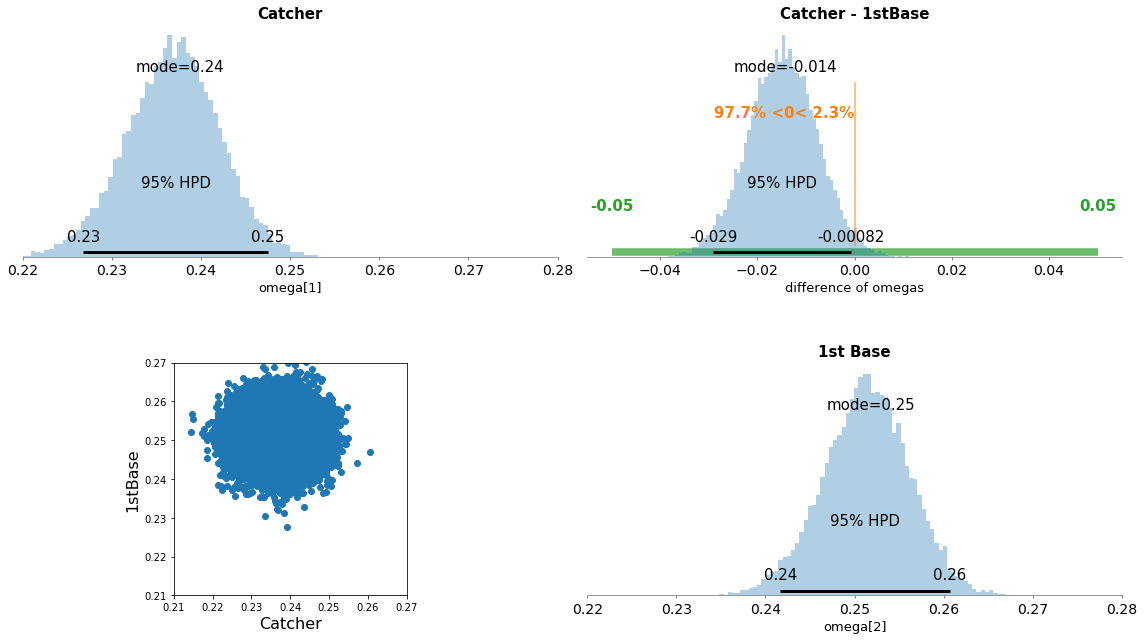

In [13]:
fig, ax = plt.subplots(2,2, figsize=(16,9))

# The catcher plot
pm.plot_posterior(
    trace['omega_c'][:,name_pos("Catcher")], ax=ax[0,0], point_estimate='mode', 
    credible_interval=0.95, kind='hist'
)
ax[0,0].set_title("Catcher", fontdict={'fontsize':15, 'fontweight':'bold'})
ax[0,0].set_xlabel(f"omega[{name_pos('Catcher')}]", fontdict={'fontsize':13})
ax[0,0].set_xlim(0.22,0.28)

# The 1st Base posterior plot
pm.plot_posterior(
        trace.omega_c[:,name_pos("1st Base")], ax=ax[1,1], point_estimate='mode', 
    credible_interval=0.95, kind='hist'
)
ax[1,1].set_title("1st Base", fontdict={'fontsize':15, 'fontweight':'bold'})
ax[1,1].set_xlabel(f"omega[{name_pos('1st Base')}]", fontdict={'fontsize':13})
ax[1,1].set_xlim(0.22,0.28)


# The difference btw Pitchers and Catchers in the posterior.
pm.plot_posterior(
    trace['omega_c1'], ax=ax[0,1], point_estimate='mode', 
    credible_interval=0.95, kind='hist', ref_val=0.0, rope=(-0.05,+0.05)
)
ax[0,1].set_title("Catcher - 1stBase", fontdict={'fontsize':15, 'fontweight':'bold'})
ax[0,1].set_xlabel('difference of omegas', fontdict={'fontsize':13})

# The scatter plot of joint distribution of catchers and pitchers ability
ax[1,0].scatter(trace.omega_c[:,name_pos("Catcher")], trace.omega_c[:,name_pos("1st Base")], marker='o')
ax[1,0].set(xlim=(0.21,0.27), ylim=(0.21,0.27), aspect='equal')
ax[1,0].set_xlabel('Catcher', fontdict={'fontsize':16})
ax[1,0].set_ylabel('1stBase', fontdict={'fontsize':16})

plt.tight_layout(h_pad=5)

# Exercises


1. Reproduce the right part of Fig. 9.15 (leading to the decision in the third paragraph of Section 12.1.2 - use that paragraph to see whether your plots make sense)


2. Attempt to regenerate Figures 12.1 from the book following these steps: 
* Generate a random sample of $\theta_1$ using a normal distribution with mode 0.58 and $\theta_2 = Normal(\theta_1, 0.08)$ 
* Explain why the above parameters have been selected for the generator
* Plot the four figures from the sample

   One way to do the above fairly fast is to build a pymc3 model without observation data and sample from this one (as if we sampled from the prior).

3. Repeat the exercise with a different generator of the sample, to reproduce the second part of the figure:
* Generate a random sample of $\theta_1$ with mode 0.58 and $\theta_2 = Normal(1 - \theta_1, 0.08)$ 
* ...

4. Repeat the exercises 2-3 but now save your sample in a file (or a variable) and use it as data for another model with a weak prior. Use the inference to estimate the posteriors and replot the same plots.  It is interesting to compare the HDI endpoints between 1/2 and 3.

   Note that posterior_plot (search in: https://docs.pymc.io/api/plots.html) takes the 'rope' as a parameter, so we can even add some simple (fake) ROPEs to the above plots. I recommend that you try that.